<!DOCTYPE html>
<html>
<head>
<style>
* {
  box-sizing: border-box;
}

.row {
  margin-left:-5px;
  margin-right:-5px;
}
  
.column {
  float: left;
  width: 50%;
  padding: 5px;
}

/* Clearfix (clear floats) */
.row::after {
  content: "";
  clear: both;
  display: table;
}

table {
  border-collapse: collapse;
  border-spacing: 0;
  width: 100%;
  border: 1px solid #ddd;
}

th, td {
  text-align: left;
  padding: 16px;
}

tr:nth-child(even) {
  background-color: #f2f2f2;
}
</style>
</head>
<body>

<h2 style="text-align: center" >BBM409 : Introduction to Machine Learning Lab.</h2>
<h4 style="text-align: center">Assignment 4 :  Neural Network  and CNN </h4>
<br>
<div class="row">
  <div class="column">
    <table>
      <tr>
        <th>First Name</th>
        <th>Last Name</th>
        <th>No</th>
      </tr>
      <tr>
        <td>Esad </td>
        <td>Boran</td>
        <td>21827206</td>
      </tr>
      <tr>
        <td>Evren</td>
        <td>Çağılcı</td>
        <td>21945977</td>
      </tr>
    </table>
  </div>
</div>

</body>
</html>

# 1. Introduction

In this assignment, we will implement a Neural Network and CNN to classify the examples on the Vegetable Image Dataset mentioned below.

We will classify image data using two different deep learning techniques.The species type for each class is stated as below:

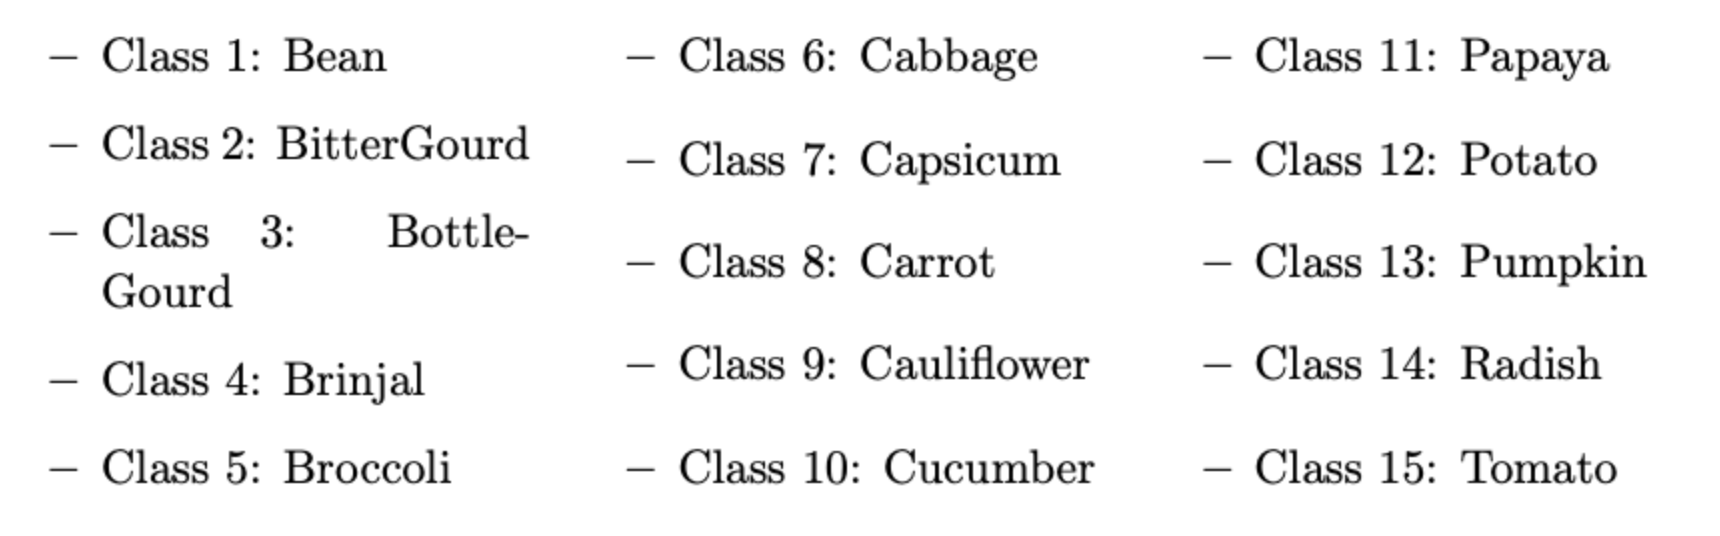


# 2. Part 1: Multi Layer Neural Network

## 2.1 Introduction of Multi Layer Neural Network

### Basics of Artificial Neural Networks <a></a>

Artificial neural networks (ANN or NN) are computing systems that are inspired by, but not identical to, biological neural networks that constitute animal brains. Such systems learn to perform tasks by considering examples, generally without being programmed with task-specific rules.

A NN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal then processes it and can signal neurons connected to it.

In ANN implementations, the "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times.

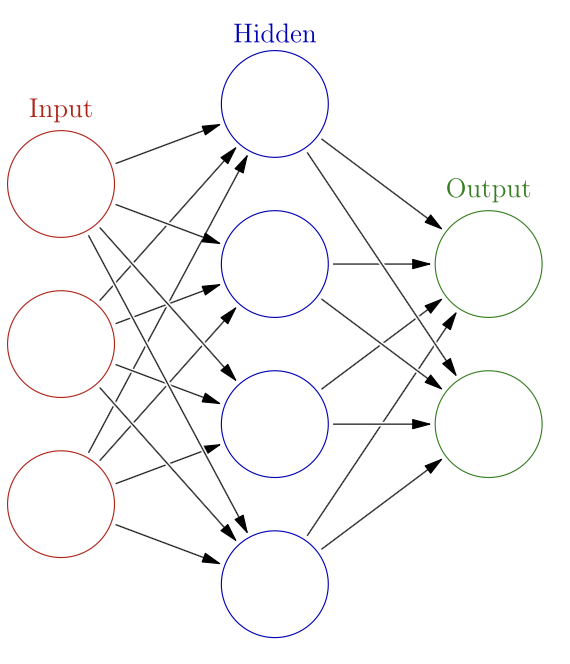

### Single-layer and Multi-layer perceptrons

A single layer perceptron (SLP) is a feed-forward network based on a threshold transfer function. SLP is the simplest type of artificial neural networks and can only classify linearly separable cases with a binary target (1, 0).

Because SLP is a linear classifier and if the cases are not linearly separable the learning process will never reach a point where all the cases are classified properly. The most famous example of the inability of perceptron to solve problems with linearly non-separable cases is the XOR problem.

A multi-layer perceptron (MLP) has the same structure of a single layer perceptron with one or more hidden layers. The backpropagation algorithm consists of two phases: the forward phase where the activations are propagated from the input to the output layer, and the backward phase, where the error between the observed actual and the requested nominal value in the output layer is propagated backwards in order to modify the weights and bias values.


### Perceptron

The perceptron is a basic function that mimics the human neuron. It receives $n$ inputs, associated to the dendrites inputs to the neuron. Each dendrite, due to *lernging*, is weighted by a number that signals its input relevance for the neuron

The signal is thus elaborated and passed through the *axon* to others neurons ; actually, the neurons *fires* the signal only if the elaborated inputs have surpassed a certain threshold; this is a spiking neuron .

The perceptron wants to mimic it. Receinving a vector (i.e. array) $x_i$ of signals, where $i$ stands for the $i$-th dendrites, it weights each of them by a vector of weights $w_i$. It adds also a *bias* to remove near-zero issues (the bias shifts the decision boundary away from the origin and does not depend on any input value).

![Perceptron](https://miro.medium.com/max/2870/1*n6sJ4yZQzwKL9wnF5wnVNg.png)

### Activation functions

<b>Sigmoid Function<b>

Also, the perceptron ignite an output through an activation function that is usually a *sigmoid* function 
$$f (x) = \frac{1}{1+e^{-x}} \,,$$

![sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

<b>or a *Relu*<b>
$$\varphi(x) = \mathrm{max}[0, x] \,,$$
![ReLU](https://upload.wikimedia.org/wikipedia/commons/6/6c/Rectifier_and_softplus_functions.svg)
    
<b>or a *TanH*<b>
 $$\text{tanh}(x) = \frac{\exp(x) - \exp(-x)}{\exp(x) + \exp(-x)}$$
    
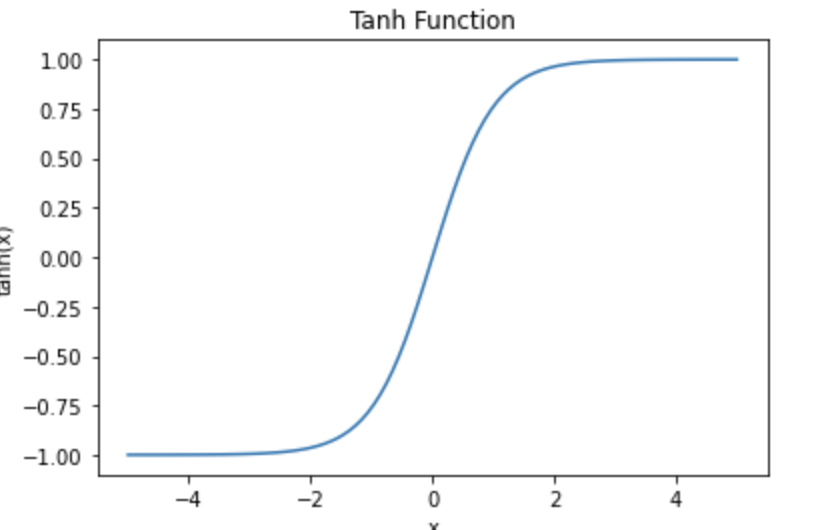


# 2.2 Required Libraries For Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2

# 2.3 Data Presentation

In [ ]:
trainpath =r"/content/drive/MyDrive/Vegatable Image/Vegetable Images/train"
testpath =r"/content/drive/MyDrive/Vegatable Image/Vegetable Images/test"
validationpath =r"/content/drive/MyDrive/Vegatable Image/Vegetable Images/validation"

In [ ]:
print("These are our labels. There are 15 label shown below : \n")

i = 1
for label in  os.listdir(testpath) :
    print(f"Label {i} : {label}")
    i += 1

These are our labels. There are 15 label shown below : 

Label 1 : Capsicum
Label 2 : Radish
Label 3 : Pumpkin
Label 4 : Cauliflower
Label 5 : Potato
Label 6 : Bean
Label 7 : Cucumber
Label 8 : Brinjal
Label 9 : Cabbage
Label 10 : Broccoli
Label 11 : Bitter_Gourd
Label 12 : Papaya
Label 13 : Bottle_Gourd
Label 14 : Tomato
Label 15 : Carrot


In [ ]:
print("For training data, there are 1000 image for each label. \n")

for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath +'//' + folder + '/*.jpg'))
    #print(f'Found {len(files)} images in folder {folder}')

For training data, there are 1000 image for each label. 



In [ ]:
print("For test data, there are 200 image for each label. \n")

for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath +'//' + folder + '/*.jpg'))
    #print(f'Found {len(files)} images in folder {folder}')

For test data, there are 200 image for each label. 



In [ ]:
print("For validation data, there are 200 image for each label. \n")

for folder in  os.listdir(validationpath) : 
    files = gb.glob(pathname= str( validationpath +'//' + folder + '/*.jpg'))
    #print(f'Found {len(files)} images in folder {folder}')

For validation data, there are 200 image for each label. 



In [ ]:
print("Here, we see the image's sizes in training data \n")

size = []
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath +'//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

Here, we see the image's sizes in training data 



(224, 224, 3)    14994
(200, 224, 3)        1
(193, 224, 3)        1
(205, 224, 3)        1
(198, 224, 3)        1
(210, 224, 3)        1
(211, 224, 3)        1
dtype: int64

In [ ]:
print("Here, we see the image's sizes in test data \n")

size = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath +'//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

Here, we see the image's sizes in test data 



(224, 224, 3)    2999
(207, 224, 3)       1
dtype: int64

In [ ]:
print("Here, we see the image's sizes in validation data \n")

size = []
for folder in  os.listdir(validationpath) : 
    files = gb.glob(pathname= str( validationpath +'//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

Here, we see the image's sizes in validation data 



(224, 224, 3)    2998
(223, 224, 3)       1
(187, 224, 3)       1
dtype: int64

In [ ]:
# We kept the class names in the label dictionary with the label encoder function
label = {}
count = 0
for x in os.listdir(trainpath):
    label.update({x:count})
    count+=1
    
print(label)

{'Capsicum': 0, 'Radish': 1, 'Pumpkin': 2, 'Cauliflower': 3, 'Potato': 4, 'Bean': 5, 'Cucumber': 6, 'Brinjal': 7, 'Cabbage': 8, 'Broccoli': 9, 'Bitter_Gourd': 10, 'Papaya': 11, 'Bottle_Gourd': 12, 'Tomato': 13, 'Carrot': 14}


In [ ]:
#Finding the name of the class given the value in the label dictionary

def getValue(n):
    if n in label.values():
        key = [k for k, v in label.items() if v == n][0]
        return key

In [ ]:
size= 52
X_train = []
y_train = []
X_test = []
y_test = []
X_valid = []
y_valid = []
X_train_grayscale  = []
X_test_grayscale = []
X_valid_grayscale = []


for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath +'//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        
        image_array = cv2.resize(image , (size,size))
        gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
        X_train_grayscale.append(gray_image)
        X_train.append(list(image_array))
       
        y_train.append([label[folder]])
        
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath +'//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (size,size))
        gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
        X_test_grayscale.append(gray_image)
        X_test.append(list(image_array))
        y_test.append([label[folder]])
        
for folder in  os.listdir(validationpath) : 
    files = gb.glob(pathname= str( validationpath +'//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (size,size))
        gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
        X_valid_grayscale.append(gray_image)
        X_valid.append(list(image_array))
        y_valid.append([label[folder]])

In [ ]:
print(f'There are {len(X_train)} items in X_train {np.shape(X_train)}')
print(f'There are {len(y_train)} items in y_train {np.shape(y_train)}')
print(f'There are {len(X_test)} items in X_test {np.shape(X_test)}')
print(f'There are {len(y_test)} items in y_test {np.shape(y_test)}')
print(f'There are {len(X_valid)} items in X_valid {np.shape(X_valid)}')
print(f'There are {len(y_valid)} items in y_valid {np.shape(y_valid)}')
print(f'There are {len(X_train_grayscale)} items in X_train_grayscale {np.shape(X_train_grayscale)}')
print(f'There are {len(X_test_grayscale)} items in X_test_grayscale {np.shape(X_test_grayscale)}')
print(f'There are {len(X_valid_grayscale)} items in X_valid_grayscale {np.shape(X_valid_grayscale)}')

There are 15000 items in X_train (15000, 52, 52, 3)
There are 15000 items in y_train (15000, 1)
There are 3000 items in X_test (3000, 52, 52, 3)
There are 3000 items in y_test (3000, 1)
There are 3000 items in X_valid (3000, 52, 52, 3)
There are 3000 items in y_valid (3000, 1)
There are 15000 items in X_train_grayscale (15000, 52, 52)
There are 3000 items in X_test_grayscale (3000, 52, 52)
There are 3000 items in X_valid_grayscale (3000, 52, 52)


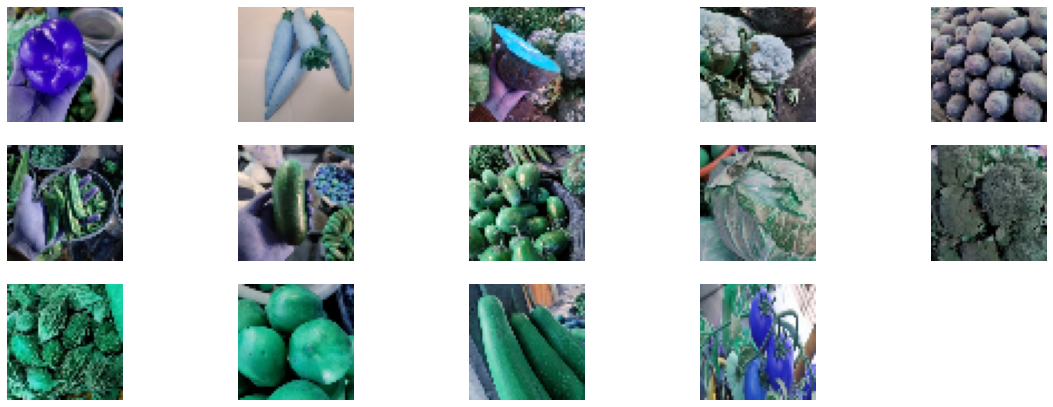

In [ ]:
# A different bgr image for each class in X_train without applying Gray_Scaling

plt.figure(figsize=(20,20))
count = 0
for i in range(14): 
    plt.subplot(8,5,i+1)
    plt.imshow(X_train[count])   
    plt.axis('off')
    plt.title(getValue(y_train[count]))
    count += 1000

# 2.4 Neural Network Class

In [ ]:
class NN:

    params = None  # Weight and bias values
    grads = None   # backward propagation values
    caches = None
    X = None  # X_train
    Y = None  # y_train
    AL = None 
    L = None
    activation = None # activate functions
    m = None
    
    
    def __init__(self,layer_dims):
        self.params = dict()
        self.grads = dict()
        self.caches = dict()
        self.initialize_params(layer_dims)
        
    
    def initialize_params(self, layer_dims):    
        
        # randomly initialize weight and bias values
     
        np.random.seed(42)
        
        L = len(layer_dims)            
        for l in range(1, L):
            self.params['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) / np.sqrt(
                layer_dims[l - 1]) # for overflow
            self.params['b' + str(l)] = np.zeros((layer_dims[l],1))
        self.L = len(self.params) // 2  
        
    def forward_propagation(self, X,Y,activation):
        
        self.X = X
        self.m = X.shape[1]
        self.Y = Y
        self.activation = activation
        A = X
        self.caches["A" + str(0)] = A
        
        
        #After calculation the input and weight values as a dot product 
        #and adding them with the bias values , 
        #we sent the values to the activate functions and obtained the new layer values.
        
        for l in range(1, self.L):
            Z = np.dot(self.params['W' + str(l)],A) + self.params['b' + str(l)]
            self.caches["Z"+ str(l)] = Z
            if activation == "sigmoid":
                A = sigmoid(Z) 
            elif activation == "relu":
                A = relu(Z)
            elif activation == "tanh":
                A = tanh(Z)
            self.caches["A" + str(l)] = A
        Z = np.dot(self.params['W' + str(self.L)],A) + self.params['b' + str(self.L)]
        self.caches["Z"+ str(self.L)] = Z
        self.caches["A" + str(self.L)] = softmax(Z)
        

    
    def backward_propagation(self): 
        
        # We kept the derivatives of a, z, b, w values and did the necessary operations.
        
        self.caches["dZ"+str(self.L)] = self.caches["A" + str(self.L)] - self.Y
        self.grads["dA" + str(self.L-1)] = np.dot(self.params["W"+str(self.L)].T, self.caches["dZ"+str(self.L)])
        self.grads["dW" + str(self.L)] = (1/self.m) * np.dot(self.caches["dZ"+str(self.L)], self.caches["A" + str(self.L-1)].T) + (0.7/self.params["W"+str(self.L)].shape[1])*self.params["W"+str(self.L)] 
        self.grads["db" + str(self.L)] = (1/self.m) * np.sum(self.caches["dZ"+str(self.L)], axis=1, keepdims=True)
        
        for l in reversed(range(1,self.L)):
            if self.activation == "relu":
                dA = self.grads["dA"+str(l)]
                self.caches["dZ"+str(l)] = relu_backward(dA, self.caches["Z"+str(l)])
            elif self.activation == "sigmoid":
                dA = self.grads["dA"+str(l)]
                self.caches["dZ"+str(l)] = sigmoid_backward(dA , self.caches["A"+str(l)])
            elif self.activation == "tanh":
                dA = self.grads["dA"+str(l)]
                self.caches["dZ"+str(l)] = tanh_backward(dA , self.caches["A"+str(l)])
            
            self.grads["dA" + str(l-1)] = np.dot(self.params["W"+str(l)].T, self.caches["dZ"+str(l)])
            self.grads["dW" + str(l)] = (1/self.m) * np.dot(self.caches["dZ"+str(l)], self.caches["A" + str(l-1)].T) + (0.7/self.params["W"+str(l)].shape[1])*self.params["W"+str(l)]
            self.grads["db" + str(l)] = (1/self.m) * np.sum(self.caches["dZ"+str(l)], axis=1, keepdims=True)
        
        
    def update(self):
        
        # We determined the new weight values according to the learning rate and dw,db values.
        
        for l in range(self.L):
            self.params["W" + str(l+1)] -= self.learning_rate * self.grads["dW" + str(l+1)]
            self.params["b" + str(l+1)] -= self.learning_rate * self.grads["db" + str(l+1)]
            
    def train(self,X_train,y_train,X_test,y_test,epochs,learning_rate,activation):
        
        #We perform one forward, one backward and one update operation 
        #according to the epochs value and certain batch size of the data to be trained.
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        for epoch in range(self.epochs):
            for i in range(len(X_train)):
                model.forward_propagation(X_train[i].T, y_train[i].T, activation)
                model.backward_propagation()
                model.update()
                           
        return self.params
    
    def predict(self,X):
        
        # According to the weight values we have, we send it in the forward process 
        #and send the result back by making appropriate actions.
        
        y_pred = list()
        self.forward_propagation(X, self.Y,self.activation)
        AL = self.caches["A" + str(self.L)].T
        
        for i in AL:        
            y_pred.append(np.argmax(i))
            
        return y_pred
    
    def predict_class(X,params, activation):
       
    
        y_pred = list()
        AL = NN.forward_predict(X, X, params, activation).T
        for i in AL:        
            y_pred.append(np.argmax(i))
        return y_pred
    def forward_predict(self, X,params,activation):
    
        L = len(params) // 2
        A = X
        for l in range(1, L):
            A_prev = A
            Z = np.dot(params['W' + str(l)],A_prev) + params['b' + str(l)]
            if activation == "sigmoid":
                A = sigmoid(Z) 
            elif activation == "relu":
                A = relu(Z)
            elif activation == "tanh":
                A = tanh(Z)
        Z = np.dot(params['W' + str(L)] ,A) + params['b' + str(L)]
        A = softmax(Z)
        return A
    
    
# Activation functions
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):    
    return np.maximum(0,Z)

def tanh(Z):    
    return (np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=0)
def relu_backward(dA,Z):
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0
    return dZ

def sigmoid_backward(dA,Z):
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ
def tanh_backward(dA,Z):
    dZ = (1 - tanh(Z)**2) * dA
    return dZ

## 2.5 Required libraries for training data and their table

In [ ]:
import numpy as np
import copy
from PIL import Image, ImageOps
import os
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

## 2.6 Data Preprocessing

In [ ]:
np.random.seed(31)


path ="/content/drive/MyDrive/Vegatable Image/Vegetable Images/validation"

translate_dict = dict()
for x,y in zip(os.listdir(path),range(len(os.listdir(path)))):
    translate_dict[x] = y
    
data = np.empty([1, 64 * 64])
label = list()
for x in os.listdir(path):
    for fname in os.listdir(path+ "/"+x)[:300]:
        image = np.array(ImageOps.grayscale(Image.open(path + "/"+x+"/"+fname)).resize((64, 64)))
        image = image / 255
        image = image.reshape((1, 64 * 64  ))
        data = np.concatenate((data,image),axis=0)
        label.append(translate_dict[x])
data = np.delete(data,0,0)
label = np.asarray([label]).T

enc = OneHotEncoder(sparse=False, categories='auto')
label = enc.fit_transform(label.reshape(len(label), -1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size=0.20,random_state=31)

In [ ]:
X_batchs = list()
y_batchs = list()
batch_size = 30

epochs = len(X_train) // batch_size
for i in range(epochs):
    X_batchs.append(X_train[i * batch_size: batch_size * (1+i)])
    y_batchs.append(y_train[i * batch_size: batch_size * (1+i)])

# 2.7 Without Hidden Layer Neural Network

A neural network without a hidden layer is a type of neural network that only has an input layer and an output layer. This means that the input data is directly passed through to the output, without any intermediate processing or transformation by hidden layers. Neural networks without hidden layers are relatively simple and are often used for basic classification tasks.


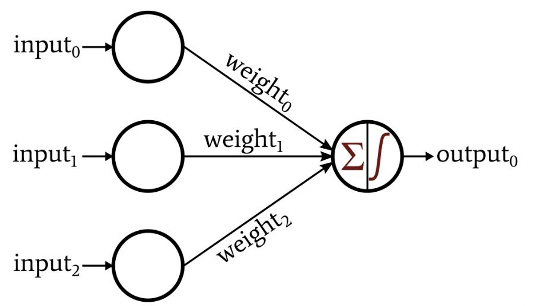


### Training according to Different Learning Rate

We tried our model without hidden layer according to different learning rate and we found the best trial on 0.1 learning rate. If we increase the epochs value to very high values, other learning rates may be so success.

<b>From now on, we will use 0.1 learning rate in our other trainings.<b>

In [ ]:
layers_dims = [4096,15]

single_layer_df = pd.DataFrame(columns=["Train f1-score","Train recall-score","Train precision-score","Train accuracy-score","Test f1-score","Test recall-score","Test precision-score","Test accuracy-score"])


for rate in [0.1,0.01,0.001,0.0001]:
    
    model = NN(layers_dims)
    
    score_train, score_test,params = model.train(X_batchs,y_batchs,X_test,y_test,500,rate,"no hidden layer")
    
    y_pred = NN.predict_class(X_train.T, params, "no hidden layer")
    test_y = np.argmax(y_train,axis=1) 
    f1_train = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_train = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_train = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_train = accuracy_score(test_y,y_pred)
    
    

    y_pred = NN.predict_class(X_test.T, params, "no hidden layer")
    test_y = np.argmax(y_test,axis=1) 
    f1_test = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_test = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_test = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_test = accuracy_score(test_y,y_pred)    
    single_layer_df.loc[str(rate)] =  [f1_train, recall_train, precision_train, acc_train, f1_test, recall_test, precision_test, acc_test]


single_layer_df

,Train f1-score,Train recall-score,Train precision-score,Train accuracy-score,Test f1-score,Test recall-score,Test precision-score,Test accuracy-score
0.1,0.971853,0.971667,0.974384,0.971667,0.283894,0.286667,0.320408,0.286667
0.01,0.921382,0.920417,0.929771,0.920417,0.304793,0.303333,0.333990,0.303333
0.001,0.610317,0.610833,0.620603,0.610833,0.302251,0.305000,0.314419,0.305000
0.0001,0.356219,0.362500,0.379048,0.362500,0.235014,0.246667,0.249455,0.246667


# 2.8 Single Hidden Layer Neural Network

A single hidden layer neural network is a type of artificial neural network that is made up of an input layer, a hidden layer, and an output layer. The input layer receives input data, the hidden layer processes the data using weights that are learned during training, and the output layer produces the network's output. The hidden layer in this type of network is called a "single hidden layer" because it is the only layer in the network that is not an input or output layer. Single hidden layer networks can be used for a wide range of tasks, including classification, regression, and clustering. They are simple to understand and implement, but may not be as powerful as deeper neural networks for more complex tasks.



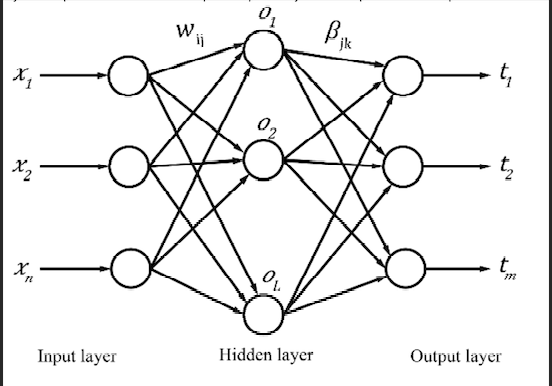


### Training according to Different Activation Functions (Sigmoid,Tanh,Relu)

We tried our model with a single hidden layer according to different activate functions and got the best result from the tanh function. We can increase the accuracy rate in other functions by handling the epochs, learning rate and batch size variables differently.

<b> From now on, we will use tanh function in our other trainings.<b>

In [ ]:
layers_dims = [4096,64,15]

one_hidden_layer_activation = pd.DataFrame(columns=["Train f1-score","Train recall-score","Train precision-score","Train accuracy-score","Test f1-score","Test recall-score","Test precision-score","Test accuracy-score"])


for activation in ["tanh","sigmoid","relu"]:
    
    model = NN(layers_dims)
    score_train, score_test,params = model.train(X_batchs,y_batchs,X_test,y_test,500,0.1,activation)
    

    y_pred = NN.predict_class(X_train.T, params,activation)
    test_y = np.argmax(y_train,axis=1) 
    f1_train = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_train = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_train = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_train = accuracy_score(test_y,y_pred)
    
    

    y_pred = NN.predict_class(X_test.T, params, activation)
    test_y = np.argmax(y_test,axis=1) 
    f1_test = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_test = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_test = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_test = accuracy_score(test_y,y_pred)    
    one_hidden_layer_activation.loc[str(activation)] =  [f1_train, recall_train, precision_train, acc_train, f1_test, recall_test, precision_test, acc_test]


one_hidden_layer_activation

,Train f1-score,Train recall-score,Train precision-score,Train accuracy-score,Test f1-score,Test recall-score,Test precision-score,Test accuracy-score
tanh,0.985923,0.985833,0.986673,0.985833,0.319119,0.320000,0.356809,0.320000
sigmoid,0.087667,0.161250,0.559075,0.161250,0.069700,0.138333,0.664430,0.138333
relu,0.050092,0.115417,0.698051,0.115417,0.033429,0.081667,0.707094,0.081667


### Training according to Different Batch Size (10,20,40)

In [ ]:
all_batchs = list()
all_y_batchs = list()
batch_size_list = [10,20,40];
for x in batch_size_list:
    X_batchs = list()
    y_batchs = list()
    batch_size = x
    epochs = len(X_train) // batch_size
    for i in range(epochs):
        X_batchs.append(X_train[i * batch_size: batch_size * (1+i)])
        y_batchs.append(y_train[i * batch_size: batch_size * (1+i)])
    all_batchs.append(X_batchs)
    all_y_batchs.append(y_batchs)

We tried our model with a single hidden layer according to different batch size values and got the best result at 40. We know that there does not appear to be much difference with other values, but in different environments, low batch size value and large batch size value may produce different results.

<b> From now on, we will use the batch size 40 value in our other trainings.<b>

In [ ]:
layers_dims = [4096,64,15]
multi_hl_batch_df = pd.DataFrame(columns=["Train f1-score","Train recall-score","Train precision-score","Train accuracy-score","Test f1-score","Test recall-score","Test precision-score","Test accuracy-score"])


for i in range(len(all_batchs)):

    model = NN(layers_dims)
    score_train, score_test,params = model.train(all_batchs[i],all_y_batchs[i],X_test,y_test,500,0.1,"tanh")
   
    
    y_pred = NN.predict_class(X_train.T, params, "tanh")
    test_y = np.argmax(y_train,axis=1) 
    f1_train = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_train = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_train = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_train = accuracy_score(test_y,y_pred)
    
    y_pred = NN.predict_class(X_test.T, params, "tanh")
    test_y = np.argmax(y_test,axis=1) 
    f1_test = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_test = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_test = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_test = accuracy_score(test_y,y_pred)    
    
    multi_hl_batch_df.loc[str(batch_size_list[i])] = [f1_train, recall_train, precision_train, acc_train, f1_test, recall_test, precision_test, acc_test]


multi_hl_batch_df

,Train f1-score,Train recall-score,Train precision-score,Train accuracy-score,Test f1-score,Test recall-score,Test precision-score,Test accuracy-score
10,0.947075,0.945000,0.956787,0.945000,0.304264,0.303333,0.354563,0.303333
20,0.968646,0.967917,0.972496,0.967917,0.315788,0.315000,0.370292,0.315000
40,0.985923,0.985833,0.986673,0.985833,0.319119,0.320000,0.356809,0.320000


# 2.8 Multi Hidden Layer Neural Network

A multi-hidden layer neural network is a type of artificial neural network that is made up of multiple hidden layers in addition to an input layer and an output layer. These hidden layers are located between the input layer and the output layer, and their purpose is to learn and extract features from the input data in order to improve the network's ability to perform a given task. Multi-hidden layer neural networks are more powerful than single hidden layer networks because they can learn more complex relationships in the data. They are also more flexible and can handle a larger variety of tasks.


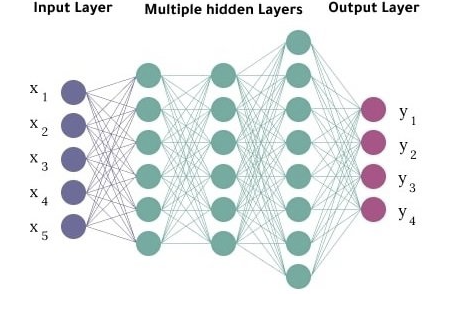


Some advantages of multi-hidden layer neural networks include:

<ul>
    <li>They are able to learn more complex relationships in the data, which can improve their performance on certain tasks.</li>
    <li>They are more flexible and can handle a wider range of tasks.</li>
    <li>They can learn to extract features from the input data, which can be useful for tasks such as image or speech recognition.</li>
</ul>

However, it is important to note that multi-hidden layer neural networks can also be more difficult to train and may require more data and computational resources. They may also be more prone to overfitting, which can reduce their generalization ability.



In [ ]:
batchs_40_list = list()
y_batchs_40_list = list()
batch_size_opt = 40
epochs_opt = len(X_train) // batch_size_opt
for i in range(epochs_opt):
    batchs_40_list.append(X_train[i * batch_size_opt: batch_size_opt * (1+i)])
    y_batchs_40_list.append(y_train[i * batch_size_opt: batch_size_opt * (1+i)])

### Training according to Different Epochs Size (100,200,400,800)

We tested our model with different epoch values using the multi hidden layer and found that 800 produced the best results. While increasing the number of epochs increases train accuracy, it can reduce test accuracy in large numbers due to overfitting. We must achieve a good balance of epochs and learning rate for this.

In [ ]:
layers_dims = [4096,256,128,64,15]

multi_hdn_with_epochs = pd.DataFrame(columns=["Train f1-score","Train recall-score","Train precision-score","Train accuracy-score","Test f1-score","Test recall-score","Test precision-score","Test accuracy-score"])


for epoch in [100,200,400,800]:

    model = NN(layers_dims)
    params = model.train(batchs_40_list,y_batchs_40_list,X_test,y_test,epoch,0.1,"tanh")
   
    
    y_pred = NN.predict_class(X_train.T, params, "tanh")
    test_y = np.argmax(y_train,axis=1) 
    f1_train = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_train = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_train = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_train = accuracy_score(test_y,y_pred)
    
    y_pred = NN.predict_class(X_test.T, params, "tanh")
    test_y = np.argmax(y_test,axis=1) 
    f1_test = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_test = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_test = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_test = accuracy_score(test_y,y_pred)    
    
    multi_hdn_with_epochs.loc[str(epoch)] = [f1_train, recall_train, precision_train, acc_train, f1_test, recall_test, precision_test, acc_test]


multi_hdn_with_epochs

,Train f1-score,Train recall-score,Train precision-score,Train accuracy-score,Test f1-score,Test recall-score,Test precision-score,Test accuracy-score
100,0.811743,0.787083,0.899554,0.787083,0.343206,0.326667,0.499450,0.326667
200,0.996678,0.996667,0.996760,0.996667,0.368079,0.373333,0.391871,0.373333
400,0.999583,0.999583,0.999586,0.999583,0.365393,0.371667,0.392041,0.371667
800,1.000000,1.000000,1.000000,1.000000,0.367919,0.376667,0.386866,0.376667


# 2.9 Part 1 : Conclusion

 
The reason why the train accuracy value of the model without hidden layer is higher than the test accuracy is :
    <ul>
        <li>One possibility is that the network is overfitting to the training data. This means that the network is discovering patterns in the training data that do not generalize well to new, previously unseen data. The network would perform well on the training data but poorly on the test data in this case. </li>
        <li>Another possibility is that the network lacks sufficient capacity to learn the underlying relationship in the data. In this case, the network would be unable to learn the required patterns in the training data and would thus perform poorly on both the training and test data.</li>
     </ul>
  
    
<br>   
The reason why multi hidden layers are better than single hidden layers is  they can learn more complex relationships in the data, multi-hidden layer neural networks generally outperform single hidden layer neural networks. This is due to the fact that each additional hidden layer in a neural network increases the model's capacity and allows it to learn more complex patterns in the data.    
</br>

<br>
In the model results we obtained, we got the best accuracy values as follows
<ul>
    <li>Learning Rate = 0.1 </li>
    <li>Epochs = 800 </li>
    <li>Activation  Functions =  TanH </li>
    <li>Batch Size = 40 </li>
</ul>
</br>  

As for the time topic, each model can train 3000 images in 10 minutes as long as it does not contain excessively large epochs values. If we train all the photos at optimal values, it can take approximately 2 hours.

<br>
The best result we achieved :
</br>
<br>

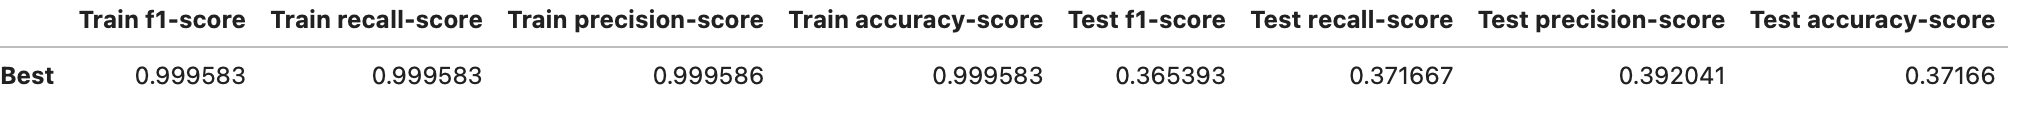

# 3  Part 2: Convolutional Neural Network

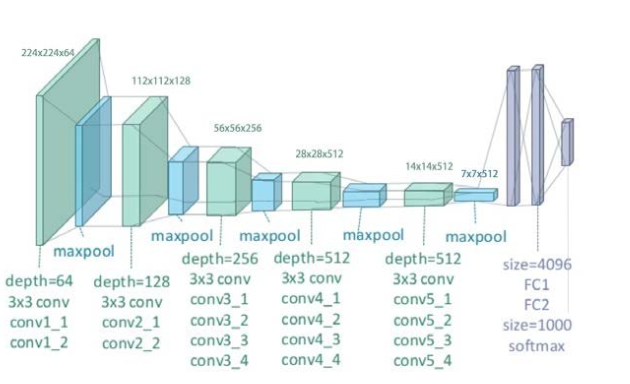


Fine-tuning is the process of training a previously trained model on new data. This is typically accomplished by modifying the layers of the pre-trained model and training the model with the new dataset. Fine-tuning can be an effective way to apply the knowledge contained in a pre-trained model to a new problem, particularly if the new dataset is small and similar to the dataset on which the model was originally trained.

The process of Feature extraction  of an input data and transforming it into a different representation that is more suitable for downstream tasks is known as feature extraction. Typically, feature extraction in the context of CNNs entails using the trained CNN as a fixed feature extractor, with the output of the CNN fed into a different classifier. This allows the classifier to use the CNN's learned features while keeping the CNN's parameters constant.

## 3.1 Required Libraries for Part 2

In [ ]:
import time
import os
import copy

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob

from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import models, transforms
from torch.autograd import Variable

# 3.2 Data Preprocessing for Part 2

In [ ]:
input_size = 224

# Number of classes in the dataset, we use it for output layer.
num_classes = 15

# Batch size for training.
batch_size = 64

# Number of epochs to train for.
num_epochs = 10

# Learning rate for training.
learning_rate = 0.001

label_dict = {'Capsicum': 0, 'Radish': 1, 'Pumpkin': 2, 'Cauliflower': 3, 'Potato': 4, 'Bean': 5, 'Cucumber': 6, 'Brinjal': 7, 'Cabbage': 8, 'Broccoli': 9, 'Bitter_Gourd': 10, 'Papaya': 11, 'Bottle_Gourd': 12, 'Tomato': 13, 'Carrot': 14}

In [ ]:
# Images are resized constentient with VGG-19 model's input size 
#     and normalized with ImageNet dataset's mean and std.
transform = transforms.Compose([
        transforms.Resize((input_size, input_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

class CustomDataset(Dataset):    
    def __init__(self, path):
        self.imgs_path = path
        self.data = glob.glob(self.imgs_path + "**/*.jpg", recursive=True)
        self.label = [label_dict[p.split('/')[-2]] for p in self.data]
        

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        img = Image.open(img_path) 
        img_tensor = transform(img)
        class_id = self.label[idx]
        return img_tensor.float(), torch.tensor([class_id])  

In [ ]:
path ="/content/drive/MyDrive/Vegatable Image/Vegetable Images/validation/"
dataset = CustomDataset(path)

In [ ]:
# Creating data indices for training,validation and test splits:
ratio = .2

data_size = len(dataset)
indices = list(range(data_size))
np.random.seed(3)
np.random.shuffle(indices)
#indices = indices[:1000]
train_indices = indices[:int(data_size * (1 - (2*ratio)))]
val_indices = indices[int(data_size * (1 - (2*ratio))):int(data_size * (1 - ratio))]
test_indices = indices[int(data_size * (1 - ratio)):]

# The datasets which we use in training step.
train_sampler = SubsetRandomSampler(train_indices)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
valid_sampler = SubsetRandomSampler(val_indices)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler)

# The data which we use test step.
test_sampler = SubsetRandomSampler(test_indices)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)

# Create training and validation dataloaders
dataloaders_dict = {'train': train_loader, 
                    'val': validation_loader}

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 3.3 Using CNN Model with Pytorch

In [ ]:
def initialize_model(num_classes, train_all_network, use_pretrained=True):
    model_vgg = models.vgg19(pretrained=use_pretrained)

    if train_all_network:
        
        softmax_num_ftrs = model_vgg.classifier[6].in_features 
        model_vgg.classifier[6] = nn.Linear(softmax_num_ftrs, num_classes)
    
   
    else:        
        for param in model_vgg.parameters():
            param.requires_grad = False       
            
        # FC 1
        fc1_num_ftrs = model_vgg.classifier[0].in_features        
        model_vgg.classifier[0] = nn.Linear(fc1_num_ftrs, 4096)
        # FC 2
        model_vgg.classifier[3] = nn.Linear(4096, 2048)        
        # Soft-max
        model_vgg.classifier[6] = nn.Linear(2048, num_classes)
        
    return model_vgg

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs):
    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    print('Training started...')
    for epoch in range(1, num_epochs + 1):
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward propagation
                with torch.set_grad_enabled(phase == 'train'):
                    
                    # Get model outputs and calculate loss                    
                    outputs = model(inputs)
                    labels = labels.squeeze_()
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
fine_tuned_model_vgg = initialize_model(num_classes, train_all_network=False, use_pretrained=True)

# Send the model to GPU
fine_tuned_model_vgg = fine_tuned_model_vgg.to(device)

params_to_update = fine_tuned_model_vgg.parameters()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=learning_rate, momentum=0.9)

# Negative Log Likelihood Loss Function
criterion = nn.CrossEntropyLoss()

# Uncomment for Train and evaluate
fine_tuned_model_vgg, hist = train_model(fine_tuned_model_vgg, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

In [ ]:
feature_extracted_model = initialize_model(num_classes, train_all_network=True, use_pretrained=True)

# Send the model to GPU
feature_extracted_model = feature_extracted_model.to(device)

params_to_update = feature_extracted_model.parameters()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=learning_rate, momentum=0.9)

# Negative Log Likelihood Loss Function
criterion = nn.CrossEntropyLoss()

# Uncomment for Train and evaluate
feature_extracted_model, hist = train_model(feature_extracted_model, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

# 3.4 Custom function for visualizing kernel weights

In [ ]:
def custom_viz(kernels):
    """
    Arguments
    =========
    kernels: Weight or activation matrix. Must be a high dimensional
    Numpy array. Tensors will not work.
    """
    def set_size(w,h, ax=None):
        """ w, h: width, height in inches """
        if not ax:
            ax=plt.gca()
        l = ax.figure.subplotpars.left
        r = ax.figure.subplotpars.right
        t = ax.figure.subplotpars.top
        b = ax.figure.subplotpars.bottom
        figw = float(w)/(r-l)
        figh = float(h)/(t-b)
        ax.figure.set_size_inches(figw, figh)
    
    Tot =  kernels.shape[0] * kernels.shape[1]
    pos = range(1, Tot + 1)

    fig = plt.figure(1)
    fig.tight_layout()
    k=0
    for i in range(kernels.shape[0]):
        for j in range(kernels.shape[1]):
            img = kernels[i][j]
            ax = fig.add_subplot(Tot//8, 8, pos[k])
            ax.imshow(img, cmap='gray')
            plt.axis('off')
            k = k+1

    set_size(30,30,ax)
    plt.show()

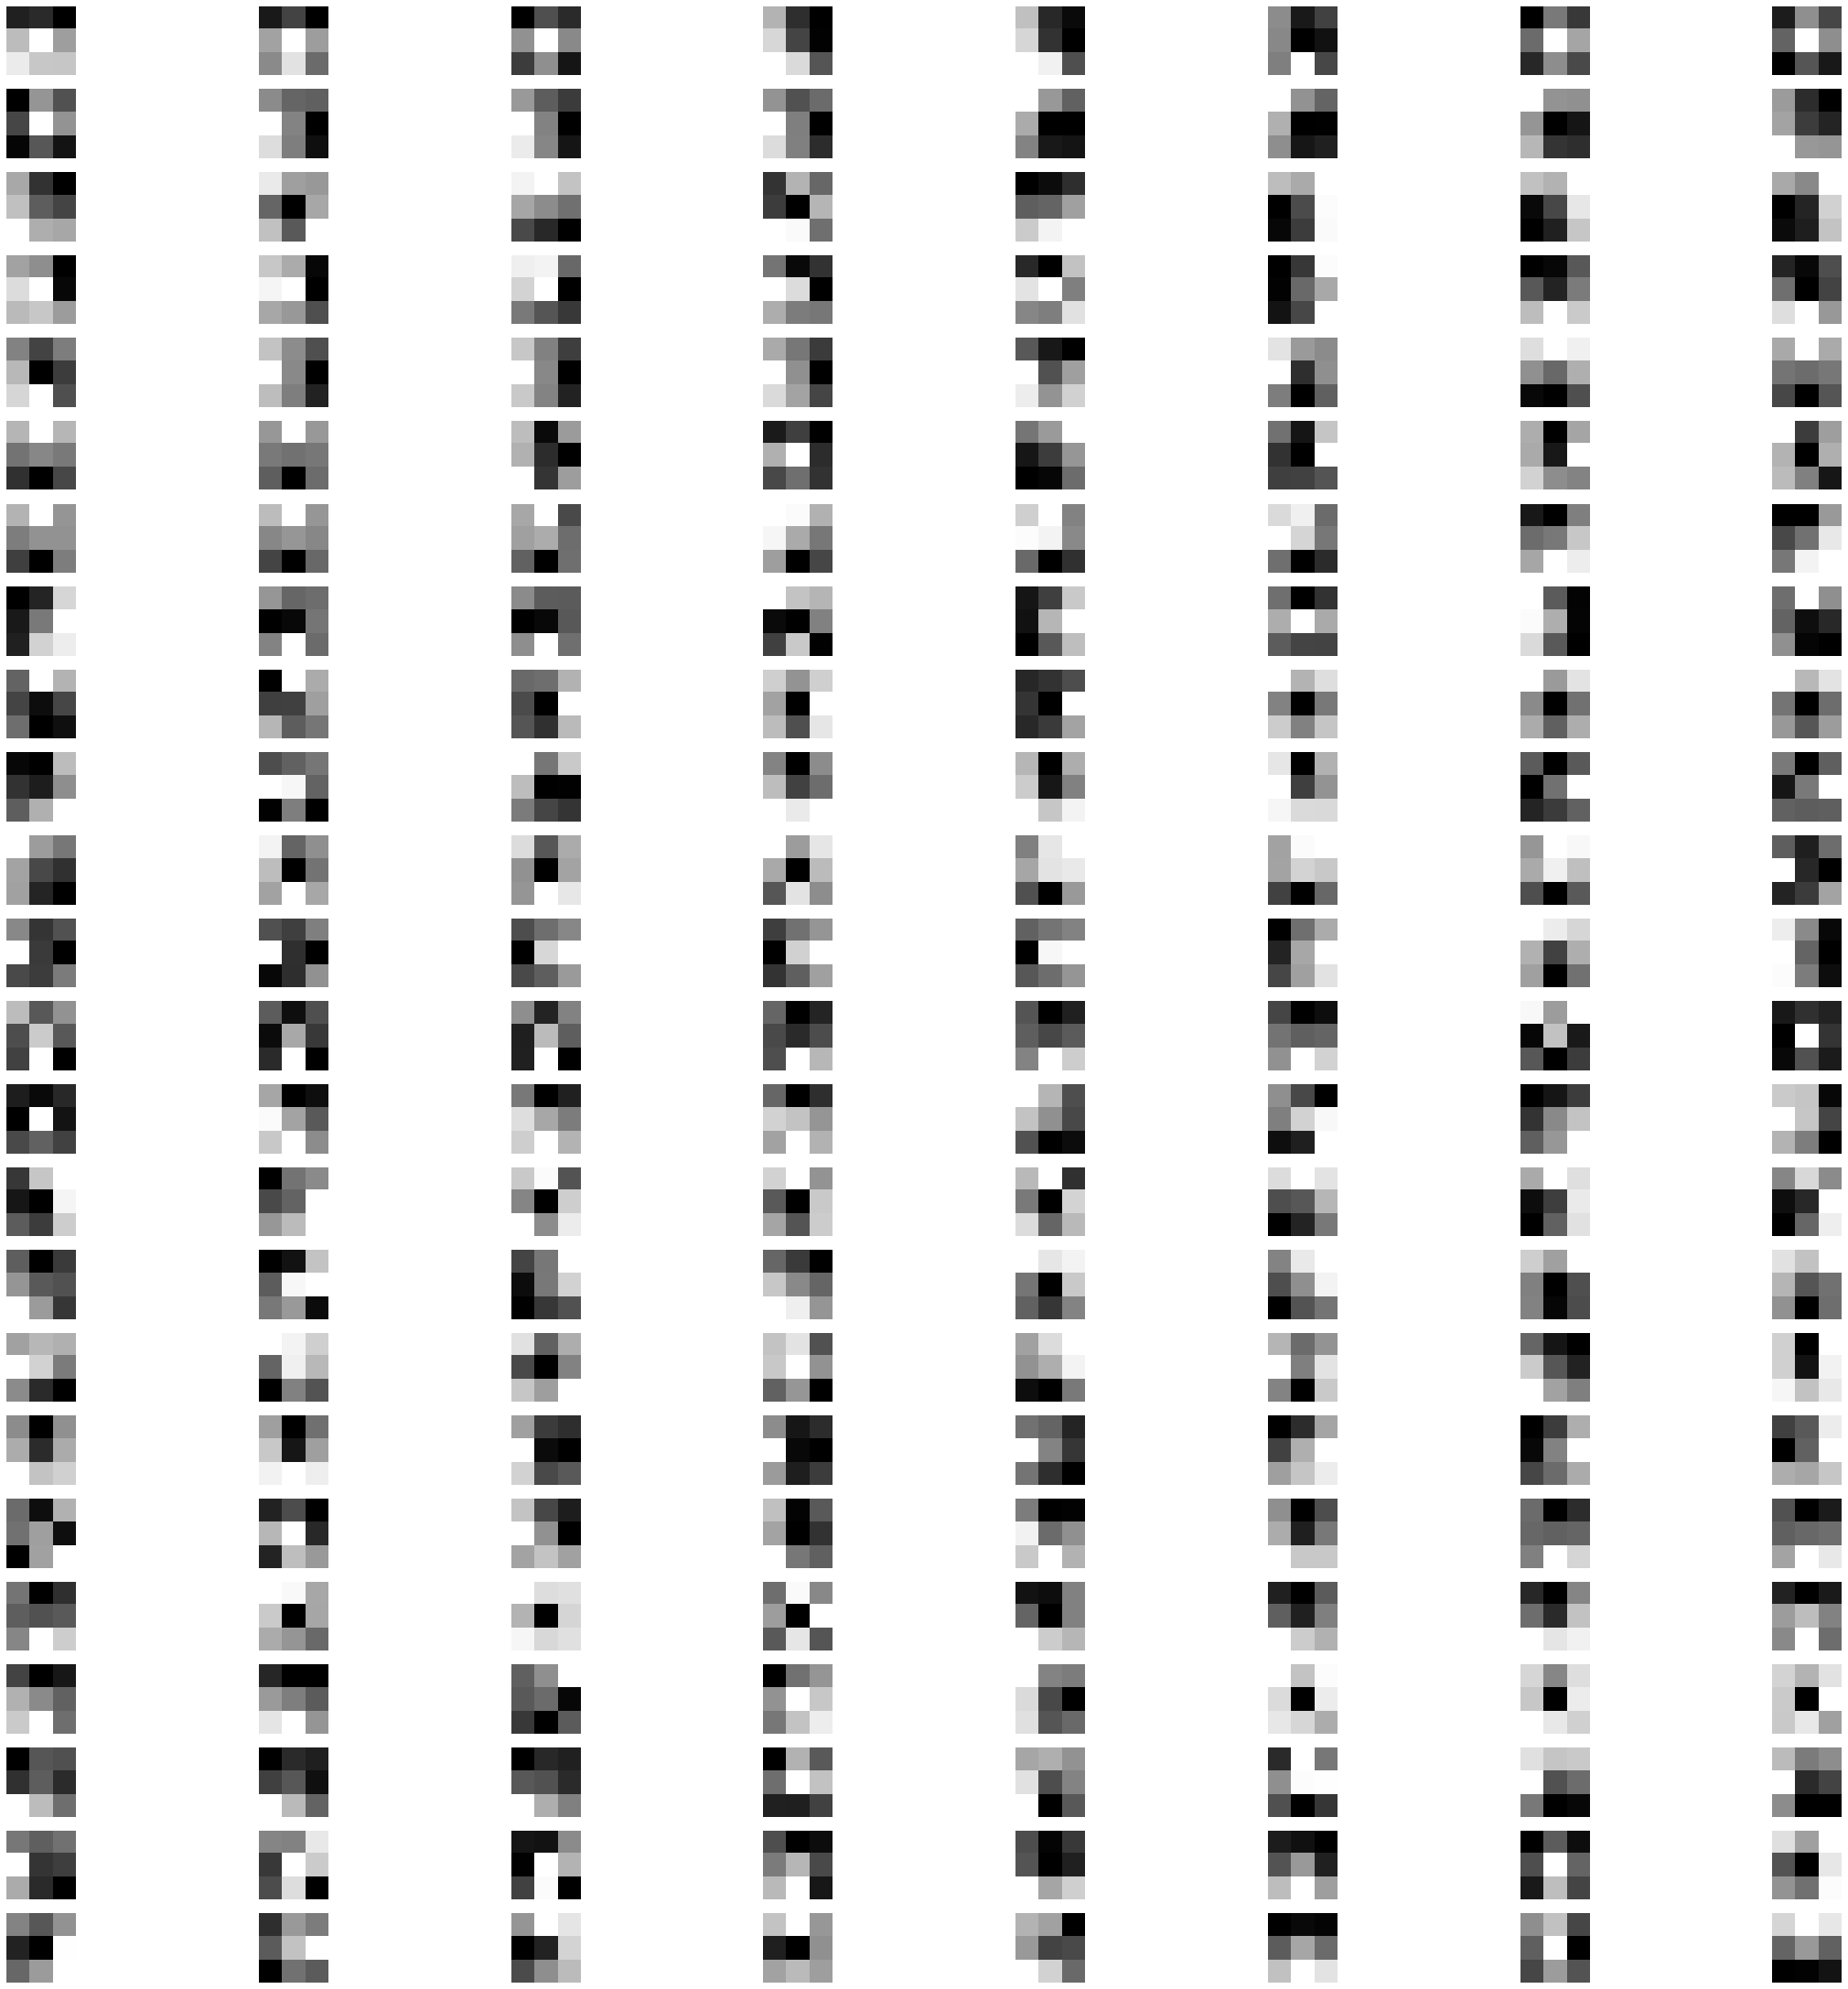

In [ ]:
kernels = fine_tuned_model_vgg.features[0].weight.cpu().detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
custom_viz(kernels)

# 3.5 Predict Model

In [ ]:
def predict_model(model, dataloader):
    was_training = model.training
    model.eval()
    y_true = list()
    y_preds = list()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                y_true.append(int(labels[j]))                
                y_preds.append(int(preds[j]))            

        model.train(mode=was_training)
        
    return y_true, y_preds

In [ ]:
y_true_fine_tuned, y_preds_fine_tuned = predict_model(fine_tuned_model_vgg, test_loader)
y_true_feature_extracted, y_preds_feature_extracted = predict_model(feature_extracted_model, test_loader)

# 3.6 Analysis Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
accuracy_fe = accuracy_score(y_true_feature_extracted, y_preds_feature_extracted)
precision_fe = precision_score(y_true_feature_extracted, y_preds_feature_extracted, average="weighted")
recall_fe = recall_score(y_true_feature_extracted, y_preds_feature_extracted, average="weighted")
f1_fe = f1_score(y_true_feature_extracted, y_preds_feature_extracted, average="weighted")
cm_fe = confusion_matrix(y_true_feature_extracted, y_preds_feature_extracted)

accuracy_ft = accuracy_score(y_true_fine_tuned, y_preds_fine_tuned)
precision_ft = precision_score(y_true_fine_tuned, y_preds_fine_tuned, average="weighted")
recall_ft = recall_score(y_true_fine_tuned, y_preds_fine_tuned, average="weighted")
f1_ft = f1_score(y_true_fine_tuned, y_preds_fine_tuned, average="weighted")
cm_ft = confusion_matrix(y_true_fine_tuned, y_preds_fine_tuned)

In [ ]:
d = {"Feature Extracted Model":[accuracy_fe, precision_fe, recall_fe, f1_fe],
    "Fine-Tuned Model": [accuracy_ft, precision_ft, recall_ft, f1_ft]}

import pandas as pd
matrices = pd.DataFrame(d.values(), index = d.keys(), columns = ["Accuracy", "Precision", "Recall", "F1 Score"])
matrices

,Accuracy,Precision,Recall,F1 Score
Feature Extracted Model,0.996667,0.996829,0.996667,0.996671
Fine-Tuned Model,0.985000,0.985742,0.985000,0.985051


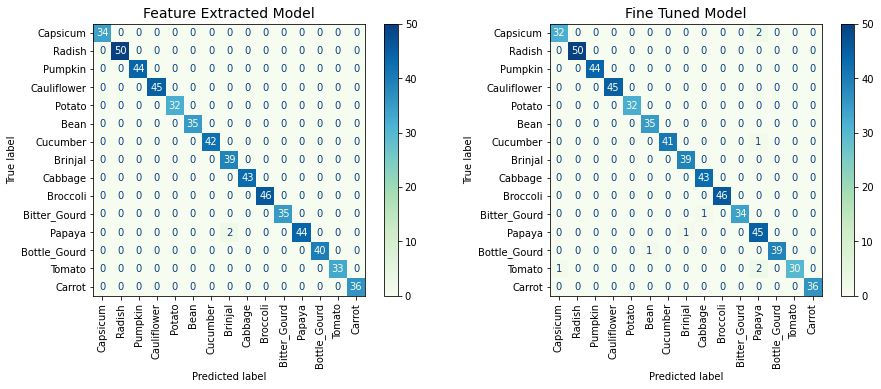

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_fe, display_labels=label_dict.keys())
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_ft, display_labels=label_dict.keys())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
disp.plot(ax=ax1, cmap='GnBu')
disp2.plot(ax=ax2, cmap='GnBu')
ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax1.set_title('Feature Extracted Model', fontsize=14)
ax2.set_title('Fine Tuned Model', fontsize=14)

plt.show()

# 3.7 Part 2: Conclusion

Based on our findings, the CNN technique is a more efficient technique for the image classification problem. The CNN technique is extremely useful for quickly building models with data, visualizing, and interpreting the model's intermediate layers. Although the train accuracy was high in the model we implemented in Part 1, the Neural network was missing in the test accuracy section, which we were able to solve using the cnn model.


If we optimally determine the batch size, learning rate, and epochs in the Cnn model, our predictive value may be good enough. We can find these values by training several models.

# 4.References

<ul>
    <li>
BBM 406 - Fundamentals of Machine Learning Web Page</li>
    <li>Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems by Aurélien Géron</li>
    <li>https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/</li>
    <li>https://pytorch.org/tutorials/beginner/data_loading_tutorial.html</li>
    <li>https://www.linkedin.com/pulse/custom-function-visualizing-ker nel-weights-activations-arun-das</li>
    <li>https://towardsdatascience.com/visualizing-convolution-neural- networks-using-pytorch-3dfa8443e74e</li>
    <li>https://discuss.pytorch.org/t/how-to-visualize-the-actual-conv olution-filters-in-cnn/13850</li>
</ul>